In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ecg_treino = pd.read_csv("ecg_treino.csv")
rotulos_treino = pd.read_csv("rotulos_treino.csv")
n_rotulos_treino = pd.read_csv("n_rotulos_treino.csv") 

In [4]:
ecg_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,649990,649991,649992,649993,649994,649995,649996,649997,649998,649999
0,Paciente101,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,...,-0.300,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00
1,Paciente106,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.290,...,1.970,1.900,1.785,1.690,1.550,1.355,1.040,0.635,0.265,0.00
2,Paciente108,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.135,...,-0.135,-0.110,-0.095,-0.110,-0.155,-0.165,-0.095,-0.010,0.040,0.00
3,Paciente109,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,...,-0.885,-0.885,-0.885,-0.875,-0.900,-0.900,-0.910,-0.920,-0.910,-1.28
4,Paciente112,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.760,-0.770,...,-0.940,-0.925,-0.915,-0.890,-0.885,-0.845,-0.820,-0.825,-0.810,-1.28


In [5]:
ecg_treino.shape

(22, 650001)

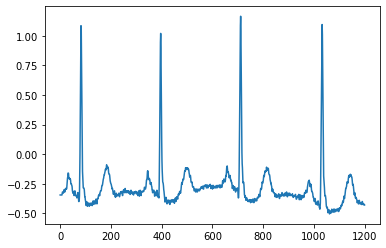

In [51]:
plt.plot(ecg_treino.iloc[0].drop('Unnamed: 0').to_numpy()[:1200])

In [9]:
rotulos_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362
0,Paciente101,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente106,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente108,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente109,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente112,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rotulo = rotulos_treino.to_numpy()